In [1]:
include("dsnb_funcs.jl")
using Optim
using Serialization;

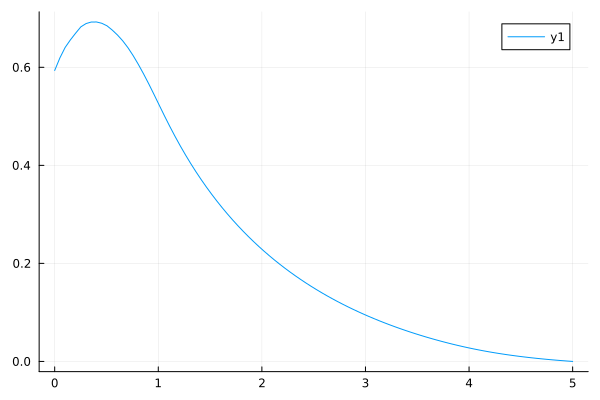

In [55]:
zs_test = range(0, 5, 100)
dsnbs_zdep = DSNB.(10, zs_test, 1, true, "NO", "21", SNRnorm)

plot(
    zs_test,
    dsnbs_zdep
)

In [57]:
dsnbs_zdep

100-element Vector{Float64}:
 0.5935922148851864
 0.6193780345426155
 0.6405899811456093
 0.6559812280125055
 0.6696771853014638
 0.6825828525142167
 0.6893138057012852
 0.6924457397519859
 0.6924958974104852
 0.6898969652931322
 0.6847010279859194
 0.6760381234253304
 0.665943360331366
 ⋮
 0.01147167739856863
 0.010101948058359114
 0.008809156084870404
 0.0075890692904475076
 0.006437634365791802
 0.0053509969487990664
 0.004325469665814779
 0.0033575939734484038
 0.002444097750445449
 0.0015818988630780806
 0.0007681064698536356
 0.0

In [61]:
using StatsBase

In [63]:
mean(zs_test, Weights(dsnbs_zdep))

1.1648754004205264

In [64]:
#=
function create_flux_dict_2ν_NOQD()

    es_dsnb = range(0.5, 40, 100)

    channels = ["1", "2", "alt"]
    progs = ["small", "large", "bh"]
    nubars = [true, false]
    logαs = range(-27.0, -23.0, 21)

    dict_dsnb = Dict{Tuple{String, String, Bool, Float64},Vector{Float64}}()
    for channel in channels
        for prog in progs
            for bar in nubars
                for logα in logαs
                    if channel == "1" || channel == "2"
                        dict_dsnb[(channel, prog, bar, logα)] = DSNB_vdecay_2ν_νe_1pc.(es_dsnb, 10^(logα), parse(Int, channel), bar, "NOQD", prog, SNRnorm)
                    else
                        dict_dsnb[(channel, prog, bar, logα)] = DSNB_vdecay_2ν_νe_1pc.(es_dsnb, 10^(logα), bar, "NOQD", prog, SNRnorm)
                    end
                end
            end
        end
    end
    return dict_dsnb
end;

dsnb_fluxes_2ν_NOQD_dict = create_flux_dict_2ν_NOQD()


open("Data/model_matrix/dsnb_fluxes_2ν_NOQD_dict.dat", "w") do io
    serialize(io, dsnb_fluxes_2ν_NOQD_dict)
end;

# Loading the precomputed 2ν DSNB fluxes

function create_flux_dict_2ν_NO()
    dict_dsnb = Dict{Tuple{String, String, Bool, Float64},Vector{Float64}}()
    for i in 1:189
        filepath = "Data/dsnb_2nu_raw_data/outputs_NO/array_output_45705961_$i.txt"
        file_content = read(filepath, String)
        parsed_data = Meta.parse(file_content)
        channel = parsed_data.args[2].args[1]
        prog = parsed_data.args[2].args[2]
        logα = log10(parsed_data.args[2].args[3])
        dsnb_nubar = [parsed_data.args[3].args[1].args[i] for i in 1:100]
        dsnb_nu = [parsed_data.args[3].args[2].args[i] for i in 1:100]

        dict_dsnb[(channel, prog, true, logα)] = dsnb_nubar
        dict_dsnb[(channel, prog, false, logα)] = dsnb_nu
    end
    return dict_dsnb
end
function create_flux_dict_2ν_IO()
    dict = Dict{Tuple{String, String, Bool, Float64},Vector{Float64}}()
    for i in 1:189
        filepath = "Data/dsnb_2nu_raw_data/outputs_IO/array_output_45706156_$i.txt"
        file_content = read(filepath, String)
        parsed_data = Meta.parse(file_content)
        channel = parsed_data.args[2].args[1]
        prog = parsed_data.args[2].args[2]
        logα = log10(parsed_data.args[2].args[3])
        dsnb_nubar = [parsed_data.args[3].args[1].args[i] for i in 1:100]
        dsnb_nu = [parsed_data.args[3].args[2].args[i] for i in 1:100]

        dict[(channel, prog, true, logα)] = dsnb_nubar
        dict[(channel, prog, false, logα)] = dsnb_nu
    end
    return dict
end

dsnb_fluxes_2ν_NO_dict = create_flux_dict_2ν_NO()
dsnb_fluxes_2ν_IO_dict = create_flux_dict_2ν_IO()

# Loading the precomputed 3ν IO DSNB fluxes 

# Case C: jobid = 45628098
# Case B: jobid = 45623263
# Case D: jobid = 45633812
function create_flux_dict_C()
    dsnb_fluxes_IO_C = Dict{Tuple{String, Bool, Float64, Float64},Vector{Float64}}()
    for i in 1:507
        filepath = "Data/dsnb_IO_raw_data/outputs_C/array_output_45628098_$i.txt"
        file_content = read(filepath, String)
        parsed_data = Meta.parse(file_content)
        prog = parsed_data.args[2].args[1]
        logα1 = log10(parsed_data.args[2].args[2])
        logα2 = log10(parsed_data.args[2].args[3])
        dsnb_nubar = [parsed_data.args[3].args[1].args[i] for i in 1:100]
        dsnb_nu = [parsed_data.args[3].args[2].args[i] for i in 1:100]

        dsnb_fluxes_IO_C[(prog, true, logα1, logα2)] = dsnb_nubar
        dsnb_fluxes_IO_C[(prog, false, logα1, logα2)] = dsnb_nu
    end
    return dsnb_fluxes_IO_C
end;
function create_flux_dict_B()
    dsnb_fluxes_IO_B = Dict{Tuple{String, Bool, Float64, Float64},Vector{Float64}}()
    for i in 1:507
        filepath = "Data/dsnb_IO_raw_data/outputs_B/array_output_45623263_$i.txt"
        file_content = read(filepath, String)
        if file_content == ""
            dsnb_fluxes_IO_B[("error", true, 0.0, 0.0)] = zeros(100)
            dsnb_fluxes_IO_B[("error", false, 0.0, 0.0)] = zeros(100)
        else
            parsed_data = Meta.parse(file_content)
            prog = parsed_data.args[2].args[1]
            logα1 = log10(parsed_data.args[2].args[2])
            logα2 = log10(parsed_data.args[2].args[3])
            dsnb_nubar = [parsed_data.args[3].args[1].args[i] for i in 1:100]
            dsnb_nu = [parsed_data.args[3].args[2].args[i] for i in 1:100]

            dsnb_fluxes_IO_B[(prog, true, logα1, logα2)] = dsnb_nubar
            dsnb_fluxes_IO_B[(prog, false, logα1, logα2)] = dsnb_nu
        end
    end
    for i in 1:960
        filepath = "Data/dsnb_IO_raw_data/outputs_B/newoutputs/array_output_45699351_$i.txt"
        file_content = read(filepath, String)
        if file_content == ""
            dsnb_fluxes_IO_B[("error", true, 0.0, 0.0)] = zeros(100)
            dsnb_fluxes_IO_B[("error", false, 0.0, 0.0)] = zeros(100)
        else
            parsed_data = Meta.parse(file_content)
            prog = parsed_data.args[2].args[1]
            logα1 = log10(parsed_data.args[2].args[2])
            logα2 = log10(parsed_data.args[2].args[3])
            dsnb_nubar = [parsed_data.args[3].args[1].args[i] for i in 1:100]
            dsnb_nu = [parsed_data.args[3].args[2].args[i] for i in 1:100]

            dsnb_fluxes_IO_B[(prog, true, logα1, logα2)] = dsnb_nubar
            dsnb_fluxes_IO_B[(prog, false, logα1, logα2)] = dsnb_nu
        end
    end

    return dsnb_fluxes_IO_B
end;
function create_flux_dict_D()
    dsnb_fluxes_IO_D = Dict{Tuple{String, Bool, Float64, Float64},Vector{Float64}}()
    for i in 1:507
        filepath = "Data/dsnb_IO_raw_data/outputs_D/array_output_45633812_$i.txt"
        file_content = read(filepath, String)
        if file_content == ""
            dsnb_fluxes_IO_D[("error", true, 0.0, 0.0)] = zeros(100)
            dsnb_fluxes_IO_D[("error", false, 0.0, 0.0)] = zeros(100)
        else
            parsed_data = Meta.parse(file_content)
            prog = parsed_data.args[2].args[1]
            logα1 = log10(parsed_data.args[2].args[2])
            logα2 = log10(parsed_data.args[2].args[3])
            dsnb_nubar = [parsed_data.args[3].args[1].args[i] for i in 1:100]
            dsnb_nu = [parsed_data.args[3].args[2].args[i] for i in 1:100]

            dsnb_fluxes_IO_D[(prog, true, logα1, logα2)] = dsnb_nubar
            dsnb_fluxes_IO_D[(prog, false, logα1, logα2)] = dsnb_nu
        end
    end
    return dsnb_fluxes_IO_D
end;
# Invisible decays
function create_flux_dict_I()
    dsnb_fluxes_IO_I = Dict{Tuple{String, Bool, Float64, Float64},Vector{Float64}}()
    for i in 1:507
        filepath = "Data/dsnb_IO_raw_data/outputs_I/array_output_45660110_$i.txt"
        file_content = read(filepath, String)
        if file_content == ""
            dsnb_fluxes_IO_I[("error", true, 0.0, 0.0)] = zeros(100)
            dsnb_fluxes_IO_I[("error", false, 0.0, 0.0)] = zeros(100)
        else
            parsed_data = Meta.parse(file_content)
            prog = parsed_data.args[2].args[1]
            logα1 = log10(parsed_data.args[2].args[2])
            logα2 = log10(parsed_data.args[2].args[3])
            dsnb_nubar = [parsed_data.args[3].args[1].args[i] for i in 1:100]
            dsnb_nu = [parsed_data.args[3].args[2].args[i] for i in 1:100]

            dsnb_fluxes_IO_I[(prog, true, logα1, logα2)] = dsnb_nubar
            dsnb_fluxes_IO_I[(prog, false, logα1, logα2)] = dsnb_nu
        end
    end
    return dsnb_fluxes_IO_I
end;

dsnb_fluxes_IO_C_dict = create_flux_dict_C()
dsnb_fluxes_IO_B_dict = create_flux_dict_B()
dsnb_fluxes_IO_D_dict = create_flux_dict_D()
dsnb_fluxes_IO_I_dict = create_flux_dict_I();

open("Data/model_matrix/dsnb_fluxes_2ν_NO_dict.dat", "w") do io
    serialize(io, dsnb_fluxes_2ν_NO_dict)
end
open("Data/model_matrix/dsnb_fluxes_2ν_IO_dict.dat", "w") do io
    serialize(io, dsnb_fluxes_2ν_IO_dict)
end
open("Data/model_matrix/dsnb_fluxes_IO_C_dict.dat", "w") do io
    serialize(io, dsnb_fluxes_IO_C_dict)
end
open("Data/model_matrix/dsnb_fluxes_IO_B_dict.dat", "w") do io
    serialize(io, dsnb_fluxes_IO_B_dict)
end
open("Data/model_matrix/dsnb_fluxes_IO_D_dict.dat", "w") do io
    serialize(io, dsnb_fluxes_IO_D_dict)
end
open("Data/model_matrix/dsnb_fluxes_IO_I_dict.dat", "w") do io
    serialize(io, dsnb_fluxes_IO_I_dict)
end;
=#

In [65]:
dsnb_fluxes_2ν_NO_dict = open("Data/model_matrix/dsnb_fluxes_2ν_NO_dict.dat", "r") do io
    deserialize(io)
end
dsnb_fluxes_2ν_NOQD_dict = open("Data/model_matrix/dsnb_fluxes_2ν_NOQD_dict.dat", "r") do io
    deserialize(io)
end
dsnb_fluxes_2ν_IO_dict = open("Data/model_matrix/dsnb_fluxes_2ν_IO_dict.dat", "r") do io
    deserialize(io)
end
dsnb_fluxes_IO_C_dict = open("Data/model_matrix/dsnb_fluxes_IO_C_dict.dat", "r") do io
    deserialize(io)
end
dsnb_fluxes_IO_B_dict = open("Data/model_matrix/dsnb_fluxes_IO_B_dict.dat", "r") do io
    deserialize(io)
end
dsnb_fluxes_IO_D_dict = open("Data/model_matrix/dsnb_fluxes_IO_D_dict.dat", "r") do io
    deserialize(io)
end
dsnb_fluxes_IO_I_dict = open("Data/model_matrix/dsnb_fluxes_IO_I_dict.dat", "r") do io
    deserialize(io)
end;

function dsnb_2ν_freefbh_precomp(logα, nubar, ordering, daughter, fbh)

    fsmall = ηAD(15, 8)/ηAD(125, 8)
    if 1 - fsmall - fbh < 0
        fbh = 0.41
    elseif fbh < 0.09
        fbh = 0.09
    end
    flarge = 1 - fsmall - fbh

    if ordering == "NO"
        return fsmall*dsnb_fluxes_2ν_NO_dict[(daughter, "small", nubar, logα)] .+ flarge*dsnb_fluxes_2ν_NO_dict[(daughter, "large", nubar, logα)] .+ fbh*dsnb_fluxes_2ν_NO_dict[(daughter, "bh", nubar, logα)]
    elseif ordering == "NOQD"
        return fsmall*dsnb_fluxes_2ν_NOQD_dict[(daughter, "small", nubar, logα)] .+ flarge*dsnb_fluxes_2ν_NOQD_dict[(daughter, "large", nubar, logα)] .+ fbh*dsnb_fluxes_2ν_NOQD_dict[(daughter, "bh", nubar, logα)]
    elseif ordering == "IO"
        return fsmall*dsnb_fluxes_2ν_IO_dict[(daughter, "small", nubar, logα)] .+ flarge*dsnb_fluxes_2ν_IO_dict[(daughter, "large", nubar, logα)] .+ fbh*dsnb_fluxes_2ν_IO_dict[(daughter, "bh", nubar, logα)]
    else
        return println("error: ordering must be 'NO' or 'IO'")
    end
end

function dsnb_2ν_freefbh(E, logα, nubar, ordering, daughter, fbh)
    es = range(0.5, 40, 100)
    dsnb_interp = Interpolations.interpolate((vec(es),), dsnb_2ν_freefbh_precomp(logα, nubar, ordering, daughter, fbh), Gridded(Linear()))
    dsnb = extrapolate(dsnb_interp, 0.0)
    return dsnb(E)
end

function dsnb_3ν_IO_freefbh_precomp(logα1, logα2, nubar, casechoice, fbh)

    fsmall = ηAD(15, 8)/ηAD(125, 8)
    if 1 - fsmall - fbh < 0
        fbh = 0.41
    elseif fbh < 0.09
        fbh = 0.09
    end
    flarge = 1 - fsmall - fbh

    if casechoice == "B"
        return fsmall*dsnb_fluxes_IO_B_dict[("small", nubar, logα1, logα2)] .+ flarge*dsnb_fluxes_IO_B_dict[("large", nubar, logα1, logα2)] .+ fbh*dsnb_fluxes_IO_B_dict[("bh", nubar, logα1, logα2)]
    elseif casechoice == "C"
        return fsmall*dsnb_fluxes_IO_C_dict[("small", nubar, logα1, logα2)] .+ flarge*dsnb_fluxes_IO_C_dict[("large", nubar, logα1, logα2)] .+ fbh*dsnb_fluxes_IO_C_dict[("bh", nubar, logα1, logα2)]
    elseif casechoice == "D"
        return fsmall*dsnb_fluxes_IO_D_dict[("small", nubar, logα1, logα2)] .+ flarge*dsnb_fluxes_IO_D_dict[("large", nubar, logα1, logα2)] .+ fbh*dsnb_fluxes_IO_D_dict[("bh", nubar, logα1, logα2)]
    elseif casechoice == "I"
        return fsmall*dsnb_fluxes_IO_I_dict[("small", nubar, logα1, logα2)] .+ flarge*dsnb_fluxes_IO_I_dict[("large", nubar, logα1, logα2)] .+ fbh*dsnb_fluxes_IO_I_dict[("bh", nubar, logα1, logα2)]
    else
        return zeros(100)
    end
end

function dsnb_3ν_IO_freefbh(E, logα1, logα2, nubar, casechoice, fbh)
    es = range(0.5, 40, 100)
    dsnb_interp = Interpolations.interpolate((vec(es),), dsnb_3ν_IO_freefbh_precomp(logα1, logα2, nubar, casechoice, fbh), Gridded(Linear()))
    dsnb = extrapolate(dsnb_interp, 0.0)
    return dsnb(E)
end;

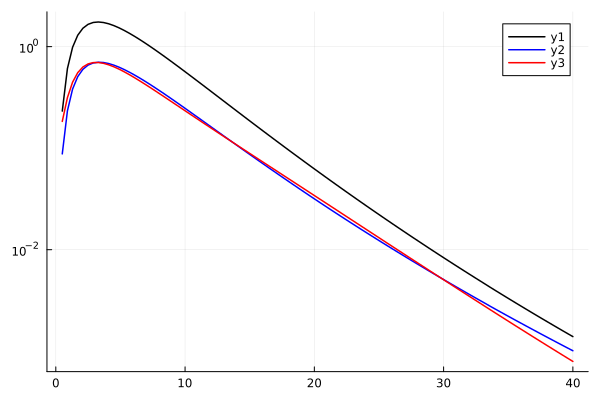

In [106]:
es_dsnb = range(0.5, 40, 100)

dsnb_SM = DSNB_freefbh.(es_dsnb, 0, true, "IO", 0.21, SNRnorm)
dsnb_QD = 0.5 * DSNB_freefbh.(es_dsnb, 0, true, "IO", 0.41, SNRnorm)
dsnb_vdecay = dsnb_2ν_freefbh.(es_dsnb, -24.8, true, "IO", "alt", 0.09)

plot(
    es_dsnb,
    [dsnb_SM dsnb_QD dsnb_vdecay],
    yscale=:log10,
    lw=1.5,
    c=[:black :blue :red]
)

In [4]:
@time dsnb_3ν_IO_freefbh_precomp(-25.0, -25.0, true, "D", 0.21)

  0.000055 seconds (13 allocations: 3.797 KiB)


100-element Vector{Float64}:
 0.18214109717475252
 0.17305267870728264
 0.16352530327322745
 0.15363494225894805
 0.14367315928984886
 0.13404165773543975
 0.12518890143378752
 0.11754481544413406
 0.11146651871879966
 0.10709272202850333
 0.10456126887979414
 0.10373725512816198
 0.10434361211973824
 ⋮
 0.002289086621132446
 0.002141708931103852
 0.0020042722764528603
 0.0018759673377902056
 0.0017563848102371243
 0.0016448045937500287
 0.0015406721877847943
 0.0014434776813921546
 0.0013527351436622092
 0.0012679025488389483
 0.001188724172031632
 0.0011147572426980156

In [5]:
# Detector stuff

nueCCxc_data = readdlm("Data/nueCC_xc.txt")

nueCC_es = 10 .^ nueCCxc_data[:,1] # GeV
σ_νeCC_vec = nueCCxc_data[:,2] .* nueCC_es .* 1e-38

σ_νeCC_interp = Interpolations.interpolate((vec(nueCC_es)*1000,), σ_νeCC_vec, Gridded(Linear()))
σ_νeCC = extrapolate(σ_νeCC_interp, 0.0)

KνeCC(u, v) = (1/(0.2*v*sqrt(2*π)))*exp(-((u-v)/(0.2*v*sqrt(2)))^2)
binint_KνeCC(Ertrue, Erreco_min, Erreco_max) = quadgk(Ereco -> KνeCC(Ertrue, Ereco), Erreco_min, Erreco_max)[1]


Δ = mass_neutron - mass_proton

# Response function
# K(u, v, experiment, channel) = (1/(δ(v, experiment, channel)*sqrt(2*π)))*exp(-((u-v)/(δ(v, experiment, channel)*sqrt(2)))^2)
σIBD(Eν) = 10^(-43) * sqrt((Eν - Δ)^2 - mass_e^2)*(Eν - Δ)*Eν^(-0.07056 + 0.02018*log(Eν) - 0.001953*(log(Eν)^3))

# Antiderivative wrt v (which is e_reco)
antiKIBD(u, v) = 0.5*(1 - erf((5*sqrt(2)*(u-v))/sqrt(v)) + expnew(200*u)*(erf((5*sqrt(2)*(u+v))/sqrt(v)) - 1))

binint_KIBD(Eetrue, Eereco_min, Eereco_max) = antiKIBD(Eetrue, Eereco_max) - antiKIBD(Eetrue, Eereco_min)


function Nt_ϵ(exp)
    if exp == "HK"
        return (2.5e34, 0.67)
    elseif exp == "JUNO"
        return (1.2e33, 0.5)
    elseif exp == "DUNE"
        return (6.02e32, 0.86)
    else
        return println("Invalid experiment choice")
    end
end

function σ(Eν, exp)
    if exp == "HK" || exp == "JUNO"
        return σIBD(Eν)
    elseif exp == "DUNE"
        return σ_νeCC(Eν)
    else
        return println("Invalid experiment choice")
    end
end

function binint_K(Et, Er_min, Er_max, exp)
    if exp == "HK" || exp == "JUNO"
        return binint_KIBD(Et, Er_min, Er_max)
    elseif exp == "DUNE"
        return binint_KνeCC(Et, Er_min, Er_max)
    else
        return println("Invalid experiment choice")
    end
end

function diff_event_rate_2ν(E, α, ordering, daughter, fbh, normchoice, exp)
    Eν = E + Δ
    if exp == "DUNE"
        nubar = false
    else
        nubar = true
    end
    if α == 0.0
        return σ(Eν, exp) * DSNB_freefbh(Eν, 0.0, nubar, ordering, fbh, normchoice)
    else
        return σ(Eν, exp) * dsnb_2ν_freefbh(Eν, log10(α), nubar, ordering, string(daughter), fbh)
    end
end

function event_rate_2ν(Emin, Emax, α, ordering, daughter, fbh, normchoice, yrs, exp)
    if exp == "DUNE"
        Etmin, Etmax = maximum([0, (Emin - 4*0.2*Emin)]), Emax + 4*0.2*Emax
    else
        Etmin, Etmax = maximum([0, (Emin - 4*0.1*sqrt(Emin))]), Emax + 4*0.1*sqrt(Emax)
    end
    Nt, ϵ = Nt_ϵ(exp)
    τ = yrs*525600*60
    return τ * Nt * ϵ * quadgk(Et -> 
        diff_event_rate_2ν(Et, α, ordering, daughter, fbh, normchoice, exp)*binint_K(Et, Emin, Emax, exp), Etmin, Etmax, rtol=1e-3)[1]
end

function diff_event_rate_3ν(E, α1, α2, casechoice, fbh, normchoice, exp)
    Eν = E + Δ
    if exp == "DUNE"
        nubar = false
    else
        nubar = true
    end
    if α1 == 0.0 && α2 == 0.0
        return σ(Eν, exp) * DSNB_freefbh(Eν, 0.0, nubar, "IO", fbh, normchoice)
    else
        return σ(Eν, exp) * dsnb_3ν_IO_freefbh(Eν, log10(α1), log10(α2), nubar, casechoice, fbh)
    end
end

function event_rate_3ν(Emin, Emax, α1, α2, casechoice, fbh, normchoice, yrs, exp)
    if exp == "DUNE"
        Etmin, Etmax = maximum([0, (Emin - 4*0.2*Emin)]), Emax + 4*0.2*Emax
    else
        Etmin, Etmax = maximum([0, (Emin - 4*0.1*sqrt(Emin))]), Emax + 4*0.1*sqrt(Emax)
    end
    Nt, ϵ = Nt_ϵ(exp)
    τ = yrs*525600*60
    return τ * Nt * ϵ * quadgk(Et -> 
        diff_event_rate_3ν(Et, α1, α2, casechoice, fbh, normchoice, exp)*binint_K(Et, Emin, Emax, exp), Etmin, Etmax, rtol=1e-3)[1]
end;

In [6]:
# Compiling all of the event rate functions to save time later

compile1 = diff_event_rate_2ν(1, 1e-24, "NOQD", 2, 0.21, SNRnorm, "HK")
compile2 = diff_event_rate_2ν(1, 1e-24, "NOQD", "alt", 0.21, SNRnorm, "HK")

compile3 = event_rate_2ν(12, 14, 1e-24, "NOQD", 2, 0.21, SNRnorm, 20, "HK")
compile4 = event_rate_2ν(12, 14, 1e-24, "NOQD", "alt", 0.21, SNRnorm, 20, "HK")

compile5 = diff_event_rate_3ν(19, 1e-27, 1e-25, "C", 0.21, SNRnorm, "DUNE")

compile6 = event_rate_3ν(19, 21, 1e-27, 1e-25, "C", 0.21, SNRnorm, 20, "DUNE");

In [7]:
# Reading in the backgrounds
HK_ebin_lowerbnds, HK_atmCC_vec = [readdlm("Data/dsnb_backgrounds/HK_atmCC.csv", ',')[:, i] for i in 1:2]
HK_atmNC_vec = readdlm("Data/dsnb_backgrounds/HK_atmNC.csv", ',')[:, 2]
HK_invismuon_vec = readdlm("Data/dsnb_backgrounds/HK_invismuon.csv", ',')[:, 2]
HK_li9spallation_vec = readdlm("Data/dsnb_backgrounds/HK_li9spallation.csv", ',')[:, 2]

JUNO_ebin_lowerbnds, JUNO_atmCC_vec = [readdlm("Data/dsnb_backgrounds/JUNO_atmCC.csv", ',')[:, i] for i in 1:2]
JUNO_atmNC_vec = readdlm("Data/dsnb_backgrounds/JUNO_atmNC.csv", ',')[:, 2]

DUNE_ebin_lowerbnds, DUNE_atmCC_vec = [readdlm("Data/dsnb_backgrounds/DUNE_atmCC.csv", ',')[:, i] for i in 1:2]

function emins_exp(exp)
    if exp == "HK"
        return 12:2:30
    elseif exp == "JUNO"
        return 10:2:32
    elseif exp == "DUNE"
        return 19:2:29
    else
        return println("Invalid experiment choice")
    end
end

background_HK(i, ηCC, ηNC, ηiμ, ηLi, years) = (years/20)*(ηCC*HK_atmCC_vec[i] + ηNC*HK_atmNC_vec[i] + ηiμ*HK_invismuon_vec[i] + ηLi*HK_li9spallation_vec[i])
background_JUNO(i, ηCC, ηNC, years) = (years/20)*(ηCC*JUNO_atmCC_vec[i] + ηNC*JUNO_atmNC_vec[i])
background_DUNE(i, ηCC, years) = (years/20)*(ηCC*DUNE_atmCC_vec[i]);

In [90]:
# The χ² functions

# Unminimized χ², fixed fbh with NC
function χ2_um(ξ, ηCC, ηNC, ηiμ, ηLi, nullsig, altsig, σRSN, σn, exp, years)
    if exp == "HK"
        χ0 = [((1+ξ)*altsig[i] + background_HK(i, ηCC, ηNC, ηiμ, ηLi, years) - nullsig[i] + 
            (nullsig[i] + background_HK(i, 1.0, 1.0, 1.0, 1.0, years))
            *log((nullsig[i] + background_HK(i, 1.0, 1.0, 1.0, 1.0, years))/((1+ξ)*altsig[i] + background_HK(i, 1+ηCC, 1+ηNC, 1+ηiμ, 1+ηLi, years)))) for i in 1:length(emins_exp("HK"))]
        return sum(χ0) + (ξ/σRSN)^2 + (ηCC/σn)^2 + (ηNC/σn)^2 + (ηiμ/σn)^2 + (ηLi/σn)^2
    elseif exp == "JUNO"
        χ0 = [((1+ξ)*altsig[i] + background_JUNO(i, ηCC, ηNC, years) - nullsig[i] + 
            (nullsig[i] + background_JUNO(i, 1.0, 1.0, years))
            *log((nullsig[i] + background_JUNO(i, 1.0, 1.0, years))/((1+ξ)*altsig[i] + background_JUNO(i, 1+ηCC, 1+ηNC, years)))) for i in 1:length(emins_exp("JUNO"))]
        return sum(χ0) + (ξ/σRSN)^2 + (ηCC/σn)^2 + (ηNC/σn)^2
    elseif exp == "DUNE"
        χ0 = [((1+ξ)*altsig[i] + background_DUNE(i, ηCC, years) - nullsig[i] + 
            (nullsig[i] + background_DUNE(i, 1.0, years))
            *log((nullsig[i] + background_DUNE(i, 1.0, years))/((1+ξ)*altsig[i] + background_DUNE(i, 1+ηCC, years)))) for i in 1:length(emins_exp("DUNE"))]
        return sum(χ0) + (ξ/σRSN)^2 + (ηCC/σn)^2
    else
        return println("Invalid experiment choice")
    end
end

# Unminimized χ², fixed fbh without NC
function χ2_um(ξ, ηCC, ηiμ, ηLi, nullsig, altsig, σRSN, σn, exp, years)
    if exp == "HK"
        χ0 = [((1+ξ)*altsig[i] + background_HK(i, ηCC, 0.0, ηiμ, ηLi, years) - nullsig[i] + 
            (nullsig[i] + background_HK(i, 1.0, 0.0, 1.0, 1.0, years))
            *log((nullsig[i] + background_HK(i, 1.0, 0.0, 1.0, 1.0, years))/((1+ξ)*altsig[i] + background_HK(i, 1+ηCC, 0.0, 1+ηiμ, 1+ηLi, years)))) for i in 1:length(emins_exp("HK"))]
        return sum(χ0) + (ξ/σRSN)^2 + (ηCC/σn)^2 + (ηiμ/σn)^2 + (ηLi/σn)^2
    elseif exp == "JUNO"
        χ0 = [((1+ξ)*altsig[i] + background_JUNO(i, ηCC, 0.0, years) - nullsig[i] + 
            (nullsig[i] + background_JUNO(i, 1.0, 0.0, years))
            *log((nullsig[i] + background_JUNO(i, 1.0, 0.0, years))/((1+ξ)*altsig[i] + background_JUNO(i, 1+ηCC, 0.0, years)))) for i in 1:length(emins_exp("JUNO"))]
        return sum(χ0) + (ξ/σRSN)^2 + (ηCC/σn)^2
    elseif exp == "DUNE"
        χ0 = [((1+ξ)*altsig[i] + background_DUNE(i, ηCC, years) - nullsig[i] + 
            (nullsig[i] + background_DUNE(i, 1.0, years))
            *log((nullsig[i] + background_DUNE(i, 1.0, years))/((1+ξ)*altsig[i] + background_DUNE(i, 1+ηCC, years)))) for i in 1:length(emins_exp("DUNE"))]
        return sum(χ0) + (ξ/σRSN)^2 + (ηCC/σn)^2
    else
        return println("Invalid experiment choice")
    end
end

# Unminimized χ², free fbh with NC, 2ν
function χ2_um(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsig, σRSN, σn, α::Float64, ordering::String, daughter, exp, years)
    emins, emaxes = emins_exp(exp), emins_exp(exp) .+ 2
    altsig = event_rate_2ν.(emins, emaxes, α, ordering, daughter, fbh, SNRnorm, years, exp)
    return χ2_um(ξ, ηCC, ηNC, ηiμ, ηLi, nullsig, altsig, σRSN, σn, exp, years)
end

# Unminimized χ², free fbh without NC, 2ν
function χ2_um(fbh, ξ, ηCC, ηiμ, ηLi, nullsig, σRSN, σn, α::Float64, ordering::String, daughter, exp, years)
    emins, emaxes = emins_exp(exp), emins_exp(exp) .+ 2
    altsig = event_rate_2ν.(emins, emaxes, α, ordering, daughter, fbh, SNRnorm, years, exp)
    return χ2_um(ξ, ηCC, ηiμ, ηLi, nullsig, altsig, σRSN, σn, exp, years)
end

# Unminimized χ², free fbh with NC, 3ν IO
function χ2_um(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsig, σRSN, σn, α1::Float64, α2::Float64, casechoice::String, exp, years)
    emins, emaxes = emins_exp(exp), emins_exp(exp) .+ 2
    altsig = event_rate_3ν.(emins, emaxes, α1, α2, casechoice, fbh, SNRnorm, years, exp)
    return χ2_um(ξ, ηCC, ηNC, ηiμ, ηLi, nullsig, altsig, σRSN, σn, exp, years)
end

# Unminimized χ², free fbh without NC, 3ν IO
function χ2_um(fbh, ξ, ηCC, ηiμ, ηLi, nullsig, σRSN, σn, α1::Float64, α2::Float64, casechoice::String, exp, years)
    emins, emaxes = emins_exp(exp), emins_exp(exp) .+ 2
    altsig = event_rate_3ν.(emins, emaxes, α1, α2, casechoice, fbh, SNRnorm, years, exp)
    return χ2_um(ξ, ηCC, ηiμ, ηLi, nullsig, altsig, σRSN, σn, exp, years)
end

# Combined unminimized χ², free fbh with NC, 2ν
function χ2_um_combined(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, α::Float64, ordering::String, daughter, years)
    return (χ2_um(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, σRSN, σn, α, ordering, daughter, "HK", years)
    + χ2_um(fbh, ξ, ηCC, ηNC, 0.0, 0.0, nullsigJUNO, σRSN, σn, α, ordering, daughter, "JUNO", years)
    + χ2_um(fbh, ξ, ηCC, 0.0, 0.0, nullsigDUNE, σRSN, σn, α, ordering, daughter, "DUNE", years))
end

# Combined unminimized χ², free fbh without NC, 2ν
function χ2_um_combined(fbh, ξ, ηCC, ηiμ, ηLi, nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, α::Float64, ordering::String, daughter, years)
    return (χ2_um(fbh, ξ, ηCC, ηiμ, ηLi, nullsigHK, σRSN, σn, α, ordering, daughter, "HK", years)
    + χ2_um(fbh, ξ, ηCC, 0.0, 0.0, nullsigJUNO, σRSN, σn, α, ordering, daughter, "JUNO", years)
    + χ2_um(fbh, ξ, ηCC, 0.0, 0.0, nullsigDUNE, σRSN, σn, α, ordering, daughter, "DUNE", years))
end

# Combined unminimized χ², free fbh with NC, 3ν IO
function χ2_um_combined(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, α1::Float64, α2::Float64, casechoice::String, years)
    return (χ2_um(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, σRSN, σn, α1, α2, casechoice, "HK", years)
    + χ2_um(fbh, ξ, ηCC, ηNC, 0.0, 0.0, nullsigJUNO, σRSN, σn, α1, α2, casechoice, "JUNO", years)
    + χ2_um(fbh, ξ, ηCC, 0.0, 0.0, nullsigDUNE, σRSN, σn, α1, α2, casechoice, "DUNE", years))
end

# Combined unminimized χ², free fbh without NC, 3ν IO
function χ2_um_combined(fbh, ξ, ηCC, ηiμ, ηLi, nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, α1::Float64, α2::Float64, casechoice::String, years)
    return (χ2_um(fbh, ξ, ηCC, ηiμ, ηLi, nullsigHK, σRSN, σn, α1, α2, casechoice, "HK", years)
    + χ2_um(fbh, ξ, ηCC, 0.0, 0.0, nullsigJUNO, σRSN, σn, α1, α2, casechoice, "JUNO", years)
    + χ2_um(fbh, ξ, ηCC, 0.0, 0.0, nullsigDUNE, σRSN, σn, α1, α2, casechoice, "DUNE", years))
end

# Combined unmiminized χ², fixed fbh with NC
function χ2_um_combined(ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, nullsigJUNO, nullsigDUNE, altsigHK, altsigJUNO, altsigDUNE, σRSN, σn, years)
    return (χ2_um(ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, altsigHK, σRSN, σn, "HK", years)
    + χ2_um(ξ, ηCC, ηNC, 0.0, 0.0, nullsigJUNO, altsigJUNO, σRSN, σn, "JUNO", years)
    + χ2_um(ξ, ηCC, 0.0, 0.0, nullsigDUNE, altsigDUNE, σRSN, σn, "DUNE", years))
end

# Combined unmiminized χ², fixed fbh without NC
function χ2_um_combined(ξ, ηCC, ηiμ, ηLi, nullsigHK, nullsigJUNO, nullsigDUNE, altsigHK, altsigJUNO, altsigDUNE, σRSN, σn, years)
    return (χ2_um(ξ, ηCC, ηiμ, ηLi, nullsigHK, altsigHK, σRSN, σn, "HK", years)
    + χ2_um(ξ, ηCC, 0.0, 0.0, nullsigJUNO, altsigJUNO, σRSN, σn, "JUNO", years)
    + χ2_um(ξ, ηCC, 0.0, 0.0, nullsigDUNE, altsigDUNE, σRSN, σn, "DUNE", years))
end

# HK+JUNO unminimized χ², free fbh with NC, 2ν
function χ2_um_HKJUNO(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, nullsigJUNO, σRSN, σn, α::Float64, ordering::String, daughter, years)
    return (χ2_um(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, σRSN, σn, α, ordering, daughter, "HK", years)
    + χ2_um(fbh, ξ, ηCC, ηNC, 0.0, 0.0, nullsigJUNO, σRSN, σn, α, ordering, daughter, "JUNO", years))
end

# HK+JUNO unminimized χ², free fbh without NC, 2ν
function χ2_um_HKJUNO(fbh, ξ, ηCC, ηiμ, ηLi, nullsigHK, nullsigJUNO, σRSN, σn, α::Float64, ordering::String, daughter, years)
    return (χ2_um(fbh, ξ, ηCC, ηiμ, ηLi, nullsigHK, σRSN, σn, α, ordering, daughter, "HK", years)
    + χ2_um(fbh, ξ, ηCC, 0.0, 0.0, nullsigJUNO, σRSN, σn, α, ordering, daughter, "JUNO", years))
end

# HK+JUNO unminimized χ², free fbh with NC, 3ν IO
function χ2_um_HKJUNO(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, nullsigJUNO, σRSN, σn, α1::Float64, α2::Float64, casechoice::String, years)
    return (χ2_um(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, σRSN, σn, α1, α2, casechoice, "HK", years)
    + χ2_um(fbh, ξ, ηCC, ηNC, 0.0, 0.0, nullsigJUNO, σRSN, σn, α1, α2, casechoice, "JUNO", years))
end

# HK+JUNO unminimized χ², free fbh without NC, 3ν IO
function χ2_um_HKJUNO(fbh, ξ, ηCC, ηiμ, ηLi, nullsigHK, nullsigJUNO, σRSN, σn, α1::Float64, α2::Float64, casechoice::String, years)
    return (χ2_um(fbh, ξ, ηCC, ηiμ, ηLi, nullsigHK, σRSN, σn, α1, α2, casechoice, "HK", years)
    + χ2_um(fbh, ξ, ηCC, 0.0, 0.0, nullsigJUNO, σRSN, σn, α1, α2, casechoice, "JUNO", years))
end

# HK+JUNO unmiminized χ², fixed fbh with NC
function χ2_um_HKJUNO(ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, nullsigJUNO, altsigHK, altsigJUNO, σRSN, σn, years)
    return (χ2_um(ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, altsigHK, σRSN, σn, "HK", years)
    + χ2_um(ξ, ηCC, ηNC, 0.0, 0.0, nullsigJUNO, altsigJUNO, σRSN, σn, "JUNO", years))
end

# HK+JUNO unmiminized χ², fixed fbh without NC
function χ2_um_HKJUNO(ξ, ηCC, ηiμ, ηLi, nullsigHK, nullsigJUNO, altsigHK, altsigJUNO, σRSN, σn, years)
    return (χ2_um(ξ, ηCC, ηiμ, ηLi, nullsigHK, altsigHK, σRSN, σn, "HK", years)
    + χ2_um(ξ, ηCC, 0.0, 0.0, nullsigJUNO, altsigJUNO, σRSN, σn, "JUNO", years))
end




fbh_inits = [0.10, 0.15, 0.21, 0.35]

x0s_wNC_HK = [vcat(fbh_init, zeros(5)) for fbh_init in fbh_inits]
x0s_noNC_HK = [vcat(fbh_init, zeros(4)) for fbh_init in fbh_inits]

x0s_wNC_JUNO = [vcat(fbh_init, zeros(3)) for fbh_init in fbh_inits]
x0s_noNC_JUNO = [vcat(fbh_init, zeros(2)) for fbh_init in fbh_inits]

x0s_DUNE = [vcat(fbh_init, zeros(2)) for fbh_init in fbh_inits]


# Full minimized χ² functions

function χ2_2ν(α, ordering, daughter, σRSN, σn, freefbh, withNC, exp, years)

    if exp == "HK"
        emins, emaxes = emins_exp("HK"), emins_exp("HK") .+ 2
        nullsig = event_rate_2ν.(emins, emaxes, 0.0, ordering, daughter, 0.21, SNRnorm, years, "HK")
        if freefbh
            if withNC
                optimizeds = [Optim.optimize(x -> χ2_um(x[1], x[2], x[3], x[4], x[5], x[6], nullsig, σRSN, σn, α, ordering, daughter, "HK", years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_wNC_HK]
            else
                optimizeds = [Optim.optimize(x -> χ2_um(x[1], x[2], x[3], x[4], x[5], nullsig, σRSN, σn, α, ordering, daughter, "HK", years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_noNC_HK]
            end
        else
            altsig = event_rate_2ν.(emins, emaxes, α, ordering, daughter, 0.21, SNRnorm, years, "HK")
            if withNC
                optimized = Optim.optimize(x -> χ2_um(x[1], x[2], x[3], x[4], x[5], nullsig, altsig, σRSN, σn, "HK", years), 
                    zeros(5), NelderMead(), Optim.Options(g_tol=1e-3))
            else
                optimized = Optim.optimize(x -> χ2_um(x[1], x[2], x[3], x[4], nullsig, altsig, σRSN, σn, "HK", years), 
                    zeros(4), NelderMead(), Optim.Options(g_tol=1e-3))
            end
        end
    elseif exp == "JUNO"
        emins, emaxes = emins_exp("JUNO"), emins_exp("JUNO") .+ 2
        nullsig = event_rate_2ν.(emins, emaxes, 0.0, ordering, daughter, 0.21, SNRnorm, years, "JUNO")
        if freefbh
            if withNC
                optimizeds = [Optim.optimize(x -> χ2_um(x[1], x[2], x[3], x[4], 0.0, 0.0, nullsig, σRSN, σn, α, ordering, daughter, "JUNO", years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_wNC_JUNO]
            else
                optimizeds = [Optim.optimize(x -> χ2_um(x[1], x[2], x[3], 0.0, 0.0, nullsig, σRSN, σn, α, ordering, daughter, "JUNO", years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_noNC_JUNO]
            end
        else
            altsig = event_rate_2ν.(emins, emaxes, α, ordering, daughter, 0.21, SNRnorm, years, "JUNO")
            if withNC
                optimized = Optim.optimize(x -> χ2_um(x[1], x[2], x[3], 0.0, 0.0, nullsig, altsig, σRSN, σn, "JUNO", years), 
                    zeros(3), NelderMead(), Optim.Options(g_tol=1e-3))
            else
                optimized = Optim.optimize(x -> χ2_um(x[1], x[2], 0.0, 0.0, nullsig, altsig, σRSN, σn, "JUNO", years), 
                    zeros(2), NelderMead(), Optim.Options(g_tol=1e-3))
            end
        end
    elseif exp == "DUNE"
        emins, emaxes = emins_exp("DUNE"), emins_exp("DUNE") .+ 2
        nullsig = event_rate_2ν.(emins, emaxes, 0.0, ordering, daughter, 0.21, SNRnorm, years, "DUNE")
        if freefbh
            optimizeds = [Optim.optimize(x -> χ2_um(x[1], x[2], x[3], 0.0, 0.0, nullsig, σRSN, σn, α, ordering, daughter, "DUNE", years), 
                x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_DUNE]
        else
            altsig = event_rate_2ν.(emins, emaxes, α, ordering, daughter, 0.21, SNRnorm, years, "DUNE")
            optimized = Optim.optimize(x -> χ2_um(x[1], x[2], 0.0, 0.0, nullsig, altsig, σRSN, σn, "DUNE", years), 
                zeros(2), NelderMead(), Optim.Options(g_tol=1e-3))
        end
    elseif exp == "combined"
        nullsigHK = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, ordering, daughter, 0.21, SNRnorm, years, "HK")
        nullsigJUNO = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 0.0, ordering, daughter, 0.21, SNRnorm, years, "JUNO")
        nullsigDUNE = event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 0.0, ordering, daughter, 0.21, SNRnorm, years, "DUNE")
        if freefbh
            if withNC
                optimizeds = [Optim.optimize(x -> χ2_um_combined(x[1], x[2], x[3], x[4], x[5], x[6],
                    nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, α, ordering, daughter, years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_wNC_HK]
            else
                optimizeds = [Optim.optimize(x -> χ2_um_combined(x[1], x[2], x[3], x[4], x[5],
                    nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, α, ordering, daughter, years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_noNC_HK]
            end
        else
            altsigHK = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, α, ordering, daughter, 0.21, SNRnorm, years, "HK")
            altsigJUNO = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, α, ordering, daughter, 0.21, SNRnorm, years, "JUNO")
            altsigDUNE = event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, α, ordering, daughter, 0.21, SNRnorm, years, "DUNE")
            if withNC
                optimized = Optim.optimize(x -> χ2_um_combined(x[1], x[2], x[3], x[4], x[5], nullsigHK, 
                nullsigJUNO, nullsigDUNE, altsigHK, altsigJUNO, altsigDUNE,
                σRSN, σn, years),
                zeros(5), NelderMead(), Optim.Options(g_tol=1e-3))
            else
                optimized = Optim.optimize(x -> χ2_um_combined(x[1], x[2], x[3], x[4], nullsigHK, 
                nullsigJUNO, nullsigDUNE, altsigHK, altsigJUNO, altsigDUNE,
                σRSN, σn, years),
                zeros(4), NelderMead(), Optim.Options(g_tol=1e-3))
            end
        end
    elseif exp == "HK+JUNO"
        nullsigHK = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, ordering, daughter, 0.21, SNRnorm, years, "HK")
        nullsigJUNO = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 0.0, ordering, daughter, 0.21, SNRnorm, years, "JUNO")
        if freefbh
            if withNC
                optimizeds = [Optim.optimize(x -> χ2_um_HKJUNO(x[1], x[2], x[3], x[4], x[5], x[6],
                    nullsigHK, nullsigJUNO, σRSN, σn, α, ordering, daughter, years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_wNC_HK]
            else
                optimizeds = [Optim.optimize(x -> χ2_um_HKJUNO(x[1], x[2], x[3], x[4], x[5],
                    nullsigHK, nullsigJUNO, σRSN, σn, α, ordering, daughter, years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_noNC_HK]
            end
        else
            altsigHK = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, α, ordering, daughter, 0.21, SNRnorm, years, "HK")
            altsigJUNO = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, α, ordering, daughter, 0.21, SNRnorm, years, "JUNO")
            if withNC
                optimized = Optim.optimize(x -> χ2_um_HKJUNO(x[1], x[2], x[3], x[4], x[5], nullsigHK, 
                nullsigJUNO, altsigHK, altsigJUNO, σRSN, σn, years),
                zeros(5), NelderMead(), Optim.Options(g_tol=1e-3))
            else
                optimized = Optim.optimize(x -> χ2_um_HKJUNO(x[1], x[2], x[3], x[4], nullsigHK, 
                nullsigJUNO, altsigHK, altsigJUNO, σRSN, σn, years),
                zeros(4), NelderMead(), Optim.Options(g_tol=1e-3))
            end
        end

    else
        return println("Error: invalid experiment choice")
    end

    if freefbh
        minims, minimizers = [optimized.minimum for optimized in optimizeds], [optimized.minimizer for optimized in optimizeds]
        min_χ2, minimizer = minimum(minims), minimizers[argmin(minims)]

        if minimizer[1] < 0.09
            minimizer[1] = 0.09
        elseif minimizer[1] > 0.41
            minimizer[1] = 0.41
        end
        return min_χ2, minimizer
    else
        return optimized.minimum, optimized.minimizer
    end
end

function χ2_3ν(α1, α2, casechoice, σRSN, σn, freefbh, withNC, exp, years)

    if exp == "HK"
        emins, emaxes = emins_exp("HK"), emins_exp("HK") .+ 2
        nullsig = event_rate_3ν.(emins, emaxes, 0.0, 0.0, "I", 0.21, SNRnorm, years, "HK")
        if freefbh
            if withNC
                optimizeds = [Optim.optimize(x -> χ2_um(x[1], x[2], x[3], x[4], x[5], x[6], nullsig, σRSN, σn, α1, α2, casechoice, "HK", years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_wNC_HK]
            else
                optimizeds = [Optim.optimize(x -> χ2_um(x[1], x[2], x[3], x[4], x[5], nullsig, σRSN, σn, α1, α2, casechoice, "HK", years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_noNC_HK]
            end
        else
            altsig = event_rate_3ν.(emins, emaxes, α1, α2, casechoice, 0.21, SNRnorm, years, "HK")
            if withNC
                optimized = Optim.optimize(x -> χ2_um(x[1], x[2], x[3], x[4], x[5], nullsig, altsig, σRSN, σn, "HK", years), 
                    zeros(5), NelderMead(), Optim.Options(g_tol=1e-3))
            else
                optimized = Optim.optimize(x -> χ2_um(x[1], x[2], x[3], x[4], nullsig, altsig, σRSN, σn, "HK", years), 
                    zeros(4), NelderMead(), Optim.Options(g_tol=1e-3))
            end
        end
    elseif exp == "JUNO"
        emins, emaxes = emins_exp("JUNO"), emins_exp("JUNO") .+ 2
        nullsig = event_rate_3ν.(emins, emaxes, 0.0, 0.0, "I", 0.21, SNRnorm, years, "JUNO")
        if freefbh
            if withNC
                optimizeds = [Optim.optimize(x -> χ2_um(x[1], x[2], x[3], x[4], 0.0, 0.0, nullsig, σRSN, σn, α1, α2, casechoice, "JUNO", years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_wNC_JUNO]
            else
                optimizeds = [Optim.optimize(x -> χ2_um(x[1], x[2], x[3], 0.0, 0.0, nullsig, σRSN, σn, α1, α2, casechoice, "JUNO", years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_noNC_JUNO]
            end
        else
            altsig = event_rate_3ν.(emins, emaxes, α1, α2, casechoice, 0.21, SNRnorm, years, "JUNO")
            if withNC
                optimized = Optim.optimize(x -> χ2_um(x[1], x[2], x[3], 0.0, 0.0, nullsig, altsig, σRSN, σn, "JUNO", years), 
                    zeros(3), NelderMead(), Optim.Options(g_tol=1e-3))
            else
                optimized = Optim.optimize(x -> χ2_um(x[1], x[2], 0.0, 0.0, nullsig, altsig, σRSN, σn, "JUNO", years), 
                    zeros(2), NelderMead(), Optim.Options(g_tol=1e-3))
            end
        end
    elseif exp == "DUNE"
        emins, emaxes = emins_exp("DUNE"), emins_exp("DUNE") .+ 2
        nullsig = event_rate_3ν.(emins, emaxes, 0.0, 0.0, "I", 0.21, SNRnorm, years, "DUNE")
        if freefbh
            optimizeds = [Optim.optimize(x -> χ2_um(x[1], x[2], x[3], 0.0, 0.0, nullsig, σRSN, σn, α1, α2, casechoice, "DUNE", years), 
                x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_DUNE]
        else
            altsig = event_rate_3ν.(emins, emaxes, α1, α2, casechoice, 0.21, SNRnorm, years, "DUNE")
            optimized = Optim.optimize(x -> χ2_um(x[1], x[2], 0.0, 0.0, nullsig, altsig, σRSN, σn, "DUNE", years), 
                zeros(2), NelderMead(), Optim.Options(g_tol=1e-3))
        end
    elseif exp == "combined"
        nullsigHK = event_rate_3ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, 0.0, "I", 0.21, SNRnorm, years, "HK")
        nullsigJUNO = event_rate_3ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 0.0, 0.0, "I", 0.21, SNRnorm, years, "JUNO")
        nullsigDUNE = event_rate_3ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 0.0, 0.0, "I", 0.21, SNRnorm, years, "DUNE")
        if freefbh
            if withNC
                optimizeds = [Optim.optimize(x -> χ2_um_combined(x[1], x[2], x[3], x[4], x[5], x[6],
                    nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, α1, α2, casechoice, years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_wNC_HK]
            else
                optimizeds = [Optim.optimize(x -> χ2_um_combined(x[1], x[2], x[3], x[4], x[5],
                    nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, α1, α2, casechoice, years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_noNC_HK]
            end
        else
            altsigHK = event_rate_3ν.(emins_exp("HK"), emins_exp("HK") .+ 2, α1, α2, casechoice, 0.21, SNRnorm, years, "HK")
            altsigJUNO = event_rate_3ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, α1, α2, casechoice, 0.21, SNRnorm, years, "JUNO")
            altsigDUNE = event_rate_3ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, α1, α2, casechoice, 0.21, SNRnorm, years, "DUNE")
            if withNC
                optimized = Optim.optimize(x -> χ2_um_combined(x[1], x[2], x[3], x[4], x[5], nullsigHK, 
                nullsigJUNO, nullsigDUNE, altsigHK, altsigJUNO, altsigDUNE,
                σRSN, σn, years),
                zeros(5), NelderMead(), Optim.Options(g_tol=1e-3))
            else
                optimized = Optim.optimize(x -> χ2_um_combined(x[1], x[2], x[3], x[4], nullsigHK, 
                nullsigJUNO, nullsigDUNE, altsigHK, altsigJUNO, altsigDUNE,
                σRSN, σn, years),
                zeros(4), NelderMead(), Optim.Options(g_tol=1e-3))
            end
        end
    elseif exp == "HK+JUNO"
        nullsigHK = event_rate_3ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, 0.0, "I", 0.21, SNRnorm, years, "HK")
        nullsigJUNO = event_rate_3ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 0.0, 0.0, "I", 0.21, SNRnorm, years, "JUNO")
        if freefbh
            if withNC
                optimizeds = [Optim.optimize(x -> χ2_um_HKJUNO(x[1], x[2], x[3], x[4], x[5], x[6],
                    nullsigHK, nullsigJUNO, σRSN, σn, α1, α2, casechoice, years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_wNC_HK]
            else
                optimizeds = [Optim.optimize(x -> χ2_um_HKJUNO(x[1], x[2], x[3], x[4], x[5],
                    nullsigHK, nullsigJUNO, σRSN, σn, α1, α2, casechoice, years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_noNC_HK]
            end
        else
            altsigHK = event_rate_3ν.(emins_exp("HK"), emins_exp("HK") .+ 2, α1, α2, casechoice, 0.21, SNRnorm, years, "HK")
            altsigJUNO = event_rate_3ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, α1, α2, casechoice, 0.21, SNRnorm, years, "JUNO")
            if withNC
                optimized = Optim.optimize(x -> χ2_um_HKJUNO(x[1], x[2], x[3], x[4], x[5], nullsigHK, 
                nullsigJUNO, altsigHK, altsigJUNO, σRSN, σn, years),
                zeros(5), NelderMead(), Optim.Options(g_tol=1e-3))
            else
                optimized = Optim.optimize(x -> χ2_um_HKJUNO(x[1], x[2], x[3], x[4], nullsigHK, 
                nullsigJUNO, altsigHK, altsigJUNO, σRSN, σn, years),
                zeros(4), NelderMead(), Optim.Options(g_tol=1e-3))
            end
        end
    else
        return println("Error: invalid experiment choice")
    end

    if freefbh
        minims, minimizers = [optimized.minimum for optimized in optimizeds], [optimized.minimizer for optimized in optimizeds]
        min_χ2, minimizer = minimum(minims), minimizers[argmin(minims)]

        if minimizer[1] < 0.09
            minimizer[1] = 0.09
        elseif minimizer[1] > 0.41
            minimizer[1] = 0.41
        end
        return min_χ2, minimizer
    else
        return optimized.minimum, optimized.minimizer
    end
end


# Combined sensitivity to "extreme" quasi-Dirac scenario

# Combined unminimized χ², free fbh with NC, 3ν IO
function χ2_um_combined_QD_withNC(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, ordering, years)

    altsigHK = 0.5*event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, ordering, 1, fbh, SNRnorm, years, "HK")
    altsigJUNO = 0.5*event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 0.0, ordering, 1, fbh, SNRnorm, years, "JUNO")
    altsigDUNE = 0.5*event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 0.0, ordering, 1, fbh, SNRnorm, years, "DUNE")

    return χ2_um_combined(ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, nullsigJUNO, nullsigDUNE, altsigHK, altsigJUNO, altsigDUNE, σRSN, σn, years)
end

function χ2_um_combined_QD_noNC(fbh, ξ, ηCC, ηiμ, ηLi, nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, ordering, years)

    altsigHK = 0.5*event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, ordering, 1, fbh, SNRnorm, years, "HK")
    altsigJUNO = 0.5*event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 0.0, ordering, 1, fbh, SNRnorm, years, "JUNO")
    altsigDUNE = 0.5*event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 0.0, ordering, 1, fbh, SNRnorm, years, "DUNE")

    return χ2_um_combined(ξ, ηCC, ηiμ, ηLi, nullsigHK, nullsigJUNO, nullsigDUNE, altsigHK, altsigJUNO, altsigDUNE, σRSN, σn, years)
end

function χ2_QD(ordering, σRSN, σn, freefbh, withNC, years)

    nullsigHK = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, ordering, 1, 0.21, SNRnorm, years, "HK")
    nullsigJUNO = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 0.0, ordering, 1, 0.21, SNRnorm, years, "JUNO")
    nullsigDUNE = event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 0.0, ordering, 1, 0.21, SNRnorm, years, "DUNE")
    if freefbh
        if withNC
            optimizeds = [Optim.optimize(x -> χ2_um_combined_QD_withNC(x[1], x[2], x[3], x[4], x[5], x[6],
                nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, ordering, years), 
                x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_wNC_HK]
        else
            optimizeds = [Optim.optimize(x -> χ2_um_combined_QD_noNC(x[1], x[2], x[3], x[4], x[5],
                nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, ordering, years), 
                x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_noNC_HK]
        end
    else
        altsigHK = 0.5*nullsigHK
        altsigJUNO = 0.5*nullsigJUNO
        altsigDUNE = 0.5*nullsigDUNE
        if withNC
            optimized = Optim.optimize(x -> χ2_um_combined(x[1], x[2], x[3], x[4], x[5], nullsigHK, 
            nullsigJUNO, nullsigDUNE, altsigHK, altsigJUNO, altsigDUNE,
            σRSN, σn, years),
            zeros(5), NelderMead(), Optim.Options(g_tol=1e-3))
        else
            optimized = Optim.optimize(x -> χ2_um_combined(x[1], x[2], x[3], x[4], nullsigHK, 
            nullsigJUNO, nullsigDUNE, altsigHK, altsigJUNO, altsigDUNE,
            σRSN, σn, years),
            zeros(4), NelderMead(), Optim.Options(g_tol=1e-3))
        end
    end

    if freefbh
        minims, minimizers = [optimized.minimum for optimized in optimizeds], [optimized.minimizer for optimized in optimizeds]
        min_χ2, minimizer = minimum(minims), minimizers[argmin(minims)]

        if minimizer[1] < 0.09
            minimizer[1] = 0.09
        elseif minimizer[1] > 0.41
            minimizer[1] = 0.41
        end
        return min_χ2, minimizer
    else
        return optimized.minimum, optimized.minimizer
    end
end;

In [99]:
years = 1:1:50

qd_chi2s_r = [χ2_QD("NO", 0.4, 0.2, false, true, year)[1] for year in years]
qd_chi2s_o = [χ2_QD("NO", 0.01, 0.01, false, false, year)[1] for year in years];

In [103]:
findlast(x -> x < 9, qd_chi2s_r) + 1

51

In [125]:
χ2_2ν(1e-23, "IO", "alt", 0.4, 0.2, true, true, "combined", 20)

(5.835640044596058, [0.09, 0.1688090047305526, 0.018301527694772585, 0.17480892093803146, 0.07938590745819135, 0.010530741768309499])

In [9]:
αs = 10 .^ range(-27, -23, 21);

In [126]:
χ2_3ν(1e-24, 1e-24, "I", 0.4, 0.2, true, true, "combined", 20)

(13.94600083451632, [0.09, 0.05322972474296587, 0.03735052797267799, 0.2902438090765673, 0.10311627975029591, 0.022475746648320544])

In [18]:
χ2_HKJUNO_3to1_NOQD_r = χ2_2ν(1e-24, "NOQD", 1, 0.4, 0.2, true, true, "HK+JUNO", 20)[1]
χ2_HKJUNODUNE_3to1_NOQD_r = χ2_2ν(1e-24, "NOQD", 1, 0.4, 0.2, true, true, "combined", 20)[1]

dune_percent_contrib_3to1_NOQD_r = χ2_HKJUNODUNE_3to1_NOQD_r/χ2_HKJUNO_3to1_NOQD_r - 1
dune_abs_contrib_3to1_NOQD_r = χ2_HKJUNODUNE_3to1_NOQD_r - χ2_HKJUNO_3to1_NOQD_r

χ2_HKJUNO_3to1_NOQD_o = χ2_2ν(1e-24, "NOQD", 1, 0.01, 0.01, false, false, "HK+JUNO", 20)[1]
χ2_HKJUNODUNE_3to1_NOQD_o = χ2_2ν(1e-24, "NOQD", 1, 0.01, 0.01, false, false, "combined", 20)[1]

dune_percent_contrib_3to1_NOQD_o = χ2_HKJUNODUNE_3to1_NOQD_o/χ2_HKJUNO_3to1_NOQD_o - 1
dune_abs_contrib_3to1_NOQD_o = χ2_HKJUNODUNE_3to1_NOQD_o - χ2_HKJUNO_3to1_NOQD_o


χ2_HKJUNO_3to1_NO_r = χ2_2ν(1e-24, "NO", 1, 0.4, 0.2, true, true, "HK+JUNO", 20)[1]
χ2_HKJUNODUNE_3to1_NO_r = χ2_2ν(1e-24, "NO", 1, 0.4, 0.2, true, true, "combined", 20)[1]

dune_percent_contrib_3to1_NO_r = χ2_HKJUNODUNE_3to1_NO_r/χ2_HKJUNO_3to1_NO_r - 1
dune_abs_contrib_3to1_NO_r = χ2_HKJUNODUNE_3to1_NO_r - χ2_HKJUNO_3to1_NO_r

χ2_HKJUNO_3to1_NO_o = χ2_2ν(1e-24, "NO", 1, 0.01, 0.01, false, false, "HK+JUNO", 20)[1]
χ2_HKJUNODUNE_3to1_NO_o = χ2_2ν(1e-24, "NO", 1, 0.01, 0.01, false, false, "combined", 20)[1]

dune_percent_contrib_3to1_NO_o = χ2_HKJUNODUNE_3to1_NO_o/χ2_HKJUNO_3to1_NO_o - 1
dune_abs_contrib_3to1_NO_o = χ2_HKJUNODUNE_3to1_NO_o - χ2_HKJUNO_3to1_NO_o


χ2_HKJUNO_1to3_IO_r = χ2_2ν(1e-24, "IO", "alt", 0.4, 0.2, true, true, "HK+JUNO", 20)[1]
χ2_HKJUNODUNE_1to3_IO_r = χ2_2ν(1e-24, "IO", "alt", 0.4, 0.2, true, true, "combined", 20)[1]

dune_percent_contrib_1to3_IO_r = χ2_HKJUNODUNE_1to3_IO_r/χ2_HKJUNO_1to3_IO_r - 1
dune_abs_contrib_1to3_IO_r = χ2_HKJUNODUNE_1to3_IO_r - χ2_HKJUNO_1to3_IO_r

χ2_HKJUNO_1to3_IO_o = χ2_2ν(1e-24, "IO", "alt", 0.01, 0.01, false, false, "HK+JUNO", 20)[1]
χ2_HKJUNODUNE_1to3_IO_o = χ2_2ν(1e-24, "IO", "alt", 0.01, 0.01, false, false, "combined", 20)[1]

dune_percent_contrib_1to3_IO_o = χ2_HKJUNODUNE_1to3_IO_o/χ2_HKJUNO_1to3_IO_o - 1
dune_abs_contrib_1to3_IO_o = χ2_HKJUNODUNE_1to3_IO_o - χ2_HKJUNO_1to3_IO_o;

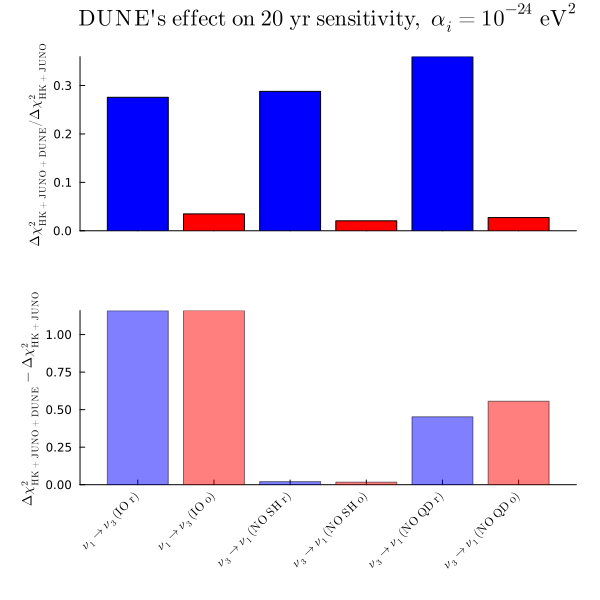

In [53]:
p1 = plot(
    [L"~", L"~~", L"~~~", L"~~~~", L"~~~~~", L"~~~~~~"],
    [dune_percent_contrib_1to3_IO_r, dune_percent_contrib_1to3_IO_o, dune_percent_contrib_3to1_NO_r, 
    dune_percent_contrib_3to1_NO_o, dune_percent_contrib_3to1_NOQD_r, dune_percent_contrib_3to1_NOQD_o],
    color=[:blue, :red, :blue, :red, :blue, :red],
    xrotation = 45,
    seriestype=:bar,
    ylims=(0, Inf),
    ylabel=L"\Delta\chi^2_\mathrm{HK+JUNO+DUNE} / \Delta\chi^2_\mathrm{HK+JUNO}",
    label=false,
    xlabelfontsize=50,
    ylabelfontsize=9,
    titlefontsize=15,
    legendfontsize=13,
    title=L"\mathrm{DUNE's~effect~on~20~yr~sensitivity,}~\alpha_i = 10^{-24}~\mathrm{eV^2}",
    grid=false
)

p2 = plot(
    [L"\nu_1 \to \nu_3~\mathrm{(IO~r)}", L"\nu_1 \to \nu_3~\mathrm{(IO~o)}", L"\nu_3 \to \nu_1~\mathrm{(NO~SH~r)}", 
    L"\nu_3 \to \nu_1~\mathrm{(NO~SH~o)}", L"\nu_3 \to \nu_1~\mathrm{(NO~QD~r)}", L"\nu_3 \to \nu_1~\mathrm{(NO~QD~o)}"],
    [dune_abs_contrib_1to3_IO_r, dune_abs_contrib_1to3_IO_o, dune_abs_contrib_3to1_NO_r, 
    dune_abs_contrib_3to1_NO_o, dune_abs_contrib_3to1_NOQD_r, dune_abs_contrib_3to1_NOQD_o],
    color=[:blue, :red, :blue, :red, :blue, :red],
    xrotation = 45,
    seriestype=:bar,
    ylims=(0, Inf),
    ylabel=L"\Delta\chi^2_\mathrm{HK+JUNO+DUNE} - \Delta\chi^2_\mathrm{HK+JUNO}",
    label=false,
    xlabelfontsize=50,
    ylabelfontsize=9,
    titlefontsize=15,
    legendfontsize=13,
    alpha=0.5,
    grid=false
)

plot(p1, p2, layout=(2,1), size=(600, 600), margins=4Plots.mm)

In [110]:
dsnb_events_HK_nodecay_NO = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, "NO", 1, 0.21, SNRnorm, 20, "HK")
dsnb_events_HK_3to1_NOQD = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 1e-24, "NOQD", 1, 0.21, SNRnorm, 20, "HK")
backgroundsum_HK = [background_HK(i, 1, 1, 1, 1, 20) for i in 1:length(emins_exp("HK"))]

dsnb_events_JUNO_nodecay_NO = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 0.0, "NO", 1, 0.21, SNRnorm, 20, "JUNO")
dsnb_events_JUNO_3to1_NOQD = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 1e-24, "NOQD", 1, 0.21, SNRnorm, 20, "JUNO")
backgroundsum_JUNO = [background_JUNO(i, 1, 1, 20) for i in 1:length(emins_exp("JUNO"))]

dsnb_events_DUNE_nodecay_NO = event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 0.0, "NO", 1, 0.21, SNRnorm, 20, "DUNE")
dsnb_events_DUNE_3to1_NOQD = event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 1e-24, "NOQD", 1, 0.21, SNRnorm, 20, "DUNE")
backgroundsum_DUNE = [background_DUNE(i, 1, 20) for i in 1:length(emins_exp("DUNE"))];

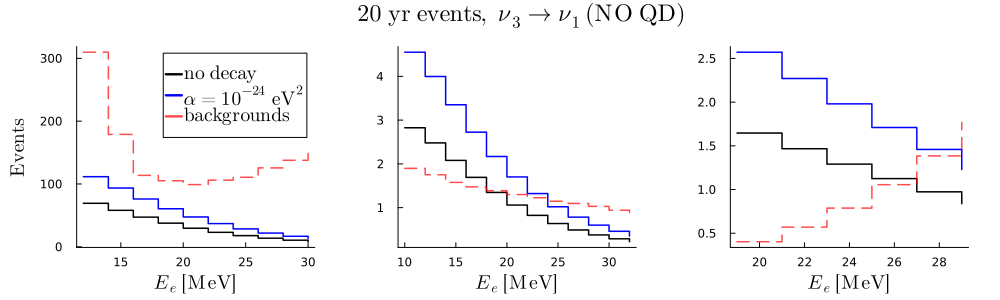

In [118]:
p1 = plot(
    emins_exp("HK"),
    [dsnb_events_HK_nodecay_NO dsnb_events_HK_3to1_NOQD backgroundsum_HK],
    c=[:black :blue :red],
    ls=[:solid :solid :dash],
    alpha=[1 1 0.7],
    lw=1.5,
    seriestype=:step,
    xlabel=L"E_e~[\mathrm{MeV}]",
    ylabel=L"\mathrm{Events}",
    label=[L"\mathrm{no~decay}" L"\mathrm{\alpha = 10^{-24}~\mathrm{eV^2}}" L"\mathrm{backgrounds}"]
)
p2 = plot(
    emins_exp("JUNO"),
    [dsnb_events_JUNO_nodecay_NO dsnb_events_JUNO_3to1_NOQD backgroundsum_JUNO],
    c=[:black :blue :red],
    ls=[:solid :solid :dash],
    alpha=[1 1 0.7],
    lw=1.5,
    seriestype=:step,
    xlabel=L"E_e~[\mathrm{MeV}]",
    label=false
)
p3 = plot(
    emins_exp("DUNE"),
    [dsnb_events_DUNE_nodecay_NO dsnb_events_DUNE_3to1_NOQD backgroundsum_DUNE],
    c=[:black :blue :red],
    ls=[:solid :solid :dash],
    alpha=[1 1 0.7],
    lw=1.5,
    seriestype=:step,
    xlabel=L"E_e~[\mathrm{MeV}]",
    label=false
)

plot(p1, p2, p3, plot_title=L"\mathrm{20~yr~events,~\nu_3 \to \nu_1~(NO~QD)}", titlefontsize=15, layout=(1,3), size=(1000,300), margins=6Plots.mm, legendfontsize=13, xlabelfontsize=13, ylabelfontsize=13, grid=false)

In [52]:
# dune_contrib_1to3_IO_r_noNC = χ2_2ν(1e-24, "IO", "alt", 0.4, 0.2, false, true, "combined", 20)[1] / χ2_2ν(1e-24, "IO", "alt", 0.4, 0.2, false, true, "HK+JUNO", 20)[1]

# dune_contrib_3to1_NO_r_noNC = χ2_2ν(1e-24, "NO", 1, 0.4, 0.2, false, true, "combined", 20)[1] / χ2_2ν(1e-24, "NO", 1, 0.4, 0.2, false, true, "HK+JUNO", 20)[1]

dune_contrib_3to1_NOQD_r_noNC = χ2_2ν(1e-24, "NOQD", 1, 0.4, 0.2, false, true, "combined", 20)[1] / χ2_2ν(1e-24, "NOQD", 1, 0.4, 0.2, false, true, "HK+JUNO", 20)[1]

pullparams_combined = χ2_2ν(1e-24, "NOQD", 1, 0.4, 0.2, false, true, "combined", 20)[2]
pullparams_HKJUNO = χ2_2ν(1e-24, "NOQD", 1, 0.4, 0.2, false, true, "HK+JUNO", 20)[2];

In [70]:
σRSNs = range(0.01, 0.4, 50)
dune_sensitivity_effect_changing_σRSN = [χ2_2ν(1e-24, "NOQD", 1, σRSN, 0.2, false, true, "combined", 20)[1] / χ2_2ν(1e-24, "NOQD", 1, σRSN, 0.2, false, true, "HK+JUNO", 20)[1] for σRSN in σRSNs]
dune_sensitivity_effect_changing_σn = [χ2_2ν(1e-24, "NOQD", 1, 0.4, σn, false, true, "combined", 20)[1] / χ2_2ν(1e-24, "NOQD", 1, 0.4, σn, false, true, "HK+JUNO", 20)[1] for σn in σRSNs];

In [73]:
dune_sensitivity_effect_changing_σRSN_noNC = [χ2_2ν(1e-24, "NOQD", 1, σRSN, 0.2, false, false, "combined", 20)[1] / χ2_2ν(1e-24, "NOQD", 1, σRSN, 0.2, false, false, "HK+JUNO", 20)[1] for σRSN in σRSNs]
dune_sensitivity_effect_changing_σn_noNC = [χ2_2ν(1e-24, "NOQD", 1, 0.4, σn, false, false, "combined", 20)[1] / χ2_2ν(1e-24, "NOQD", 1, 0.4, σn, false, false, "HK+JUNO", 20)[1] for σn in σRSNs];

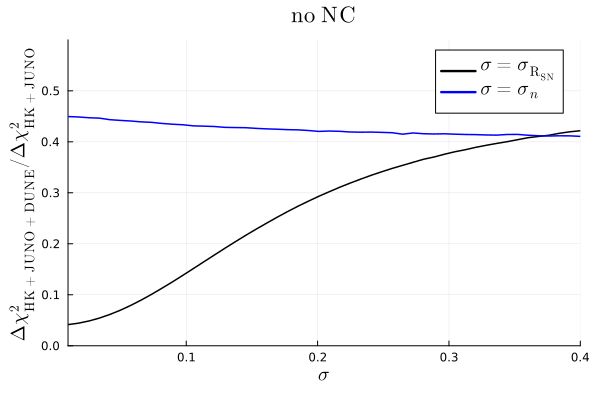

In [80]:
plot(
    σRSNs,
    [(dune_sensitivity_effect_changing_σRSN_noNC .- 1) (dune_sensitivity_effect_changing_σn_noNC .- 1)],
    ylims=(0, 0.6),
    xlims=(0.01, 0.4),
    label=[L"\sigma = \sigma_\mathrm{R_{SN}}" L"\sigma = \sigma_n"],
    c=[:black :blue],
    lw=1.5,
    xlabel=L"\sigma",
    ylabel=L"\Delta\chi^2_\mathrm{HK+JUNO+DUNE} / \Delta\chi^2_\mathrm{HK+JUNO}",
    xlabelfontsize=13,
    ylabelfontsize=13,
    titlefontsize=15,
    legendfontsize=13,
    title=L"\mathrm{no~NC}",
    margins=3Plots.mm
)

In [56]:
χ2_2ν(1e-24, "NOQD", 1, 0.4, 0.2, false, true, "combined", 20)[1]

1.7113161773003545

In [57]:
χ2_2ν(1e-24, "NOQD", 1, 0.4, 0.2, false, true, "HK+JUNO", 20)[1]

1.2647685139412763

In [53]:
pullparams_combined

5-element Vector{Float64}:
 -0.24262749512966778
 -0.003388185648871907
 -0.06372480683467302
 -0.023901246541082874
 -0.008234708802419409

In [54]:
pullparams_HKJUNO

5-element Vector{Float64}:
 -0.2651564723726937
 -0.0019519089938726504
 -0.053547131790631565
 -0.020304289396774942
 -0.007475568668780481

In [43]:
chi2_2to1_IO_HK_r = [χ2_2ν(α, "IO", 1, 0.4, 0.2, true, true, "HK", 20)[1] for α in αs]

21-element Vector{Float64}:
 0.0006315024878864733
 0.0007523114384229391
 0.001194398440745364
 0.0033306810242173792
 0.004761613647869081
 0.004565694318720005
 0.014160587993009524
 0.01970986492672132
 0.03979984881177435
 0.07920791162238805
 0.12465940408550408
 0.18055860944215454
 0.23369601057533615
 0.2726322656977514
 0.2961482955905315
 0.3087940405710198
 0.31633845315582737
 0.31899645390370346
 0.32265621932395205
 0.32446522394940464
 0.32608432512115004

In [64]:
exposures = 1:1:50

chi2_2to1_IO_diffexposures_r = zeros(50)
chi2_2to1_IO_diffexposures_o = zeros(50)
chi2_2to3_IO_diffexposures_r = zeros(50)
chi2_2to3_IO_diffexposures_o = zeros(50)
chi2_1to3_IO_diffexposures_r = zeros(50)
chi2_1to3_IO_diffexposures_o = zeros(50)

for (i, τ) in enumerate(exposures)
    chi2_2to1_IO_diffexposures_r[i] = χ2_2ν(1e-24, "IO", 1, 0.4, 0.2, true, true, "combined", τ)[1]
    chi2_2to1_IO_diffexposures_o[i] = χ2_2ν(1e-24, "IO", 1, 0.01, 0.01, false, false, "combined", τ)[1]
    chi2_2to3_IO_diffexposures_r[i] = χ2_2ν(1e-24, "IO", 3, 0.4, 0.2, true, true, "combined", τ)[1]
    chi2_2to3_IO_diffexposures_o[i] = χ2_2ν(1e-24, "IO", 3, 0.01, 0.01, false, false, "combined", τ)[1]
    chi2_1to3_IO_diffexposures_r[i] = χ2_2ν(1e-24, "IO", "alt", 0.4, 0.2, true, true, "combined", τ)[1]
    chi2_1to3_IO_diffexposures_o[i] = χ2_2ν(1e-24, "IO", "alt", 0.01, 0.01, false, false, "combined", τ)[1]
end

In [66]:
chi2_2to1_NO_diffexposures_r = zeros(50)
chi2_2to1_NO_diffexposures_o = zeros(50)
chi2_3to1_NO_diffexposures_r = zeros(50)
chi2_3to1_NO_diffexposures_o = zeros(50)
chi2_3to2_NO_diffexposures_r = zeros(50)
chi2_3to2_NO_diffexposures_o = zeros(50)

for (i, τ) in enumerate(exposures)
    chi2_2to1_NO_diffexposures_r[i] = χ2_2ν(1e-24, "NO", "alt", 0.4, 0.2, true, true, "combined", τ)[1]
    chi2_2to1_NO_diffexposures_o[i] = χ2_2ν(1e-24, "NO", "alt", 0.01, 0.01, false, false, "combined", τ)[1]
    chi2_3to1_NO_diffexposures_r[i] = χ2_2ν(1e-24, "NO", 1, 0.4, 0.2, true, true, "combined", τ)[1]
    chi2_3to1_NO_diffexposures_o[i] = χ2_2ν(1e-24, "NO", 1, 0.01, 0.01, false, false, "combined", τ)[1]
    chi2_3to2_NO_diffexposures_r[i] = χ2_2ν(1e-24, "NO", 2, 0.4, 0.2, true, true, "combined", τ)[1]
    chi2_3to2_NO_diffexposures_o[i] = χ2_2ν(1e-24, "NO", 2, 0.01, 0.01, false, false, "combined", τ)[1]
end

In [342]:
chi2_2to1_NOQD_diffexposures_r = zeros(50)
chi2_2to1_NOQD_diffexposures_o = zeros(50)
chi2_3to1_NOQD_diffexposures_r = zeros(50)
chi2_3to1_NOQD_diffexposures_o = zeros(50)
chi2_3to2_NOQD_diffexposures_r = zeros(50)
chi2_3to2_NOQD_diffexposures_o = zeros(50)

for (i, τ) in enumerate(exposures)
    chi2_2to1_NOQD_diffexposures_r[i] = χ2_2ν(1e-24, "NOQD", "alt", 0.4, 0.2, true, true, "combined", τ)[1]
    chi2_2to1_NOQD_diffexposures_o[i] = χ2_2ν(1e-24, "NOQD", "alt", 0.01, 0.01, false, false, "combined", τ)[1]
    chi2_3to1_NOQD_diffexposures_r[i] = χ2_2ν(1e-24, "NOQD", 1, 0.4, 0.2, true, true, "combined", τ)[1]
    chi2_3to1_NOQD_diffexposures_o[i] = χ2_2ν(1e-24, "NOQD", 1, 0.01, 0.01, false, false, "combined", τ)[1]
    chi2_3to2_NOQD_diffexposures_r[i] = χ2_2ν(1e-24, "NOQD", 2, 0.4, 0.2, true, true, "combined", τ)[1]
    chi2_3to2_NOQD_diffexposures_o[i] = χ2_2ν(1e-24, "NOQD", 2, 0.01, 0.01, false, false, "combined", τ)[1]
end

In [350]:
@time χ2_2ν(1e-24, "NOQD", 1, 0.4, 0.2, true, true, "combined", 20)[1]

 11.096111 seconds (40.09 M allocations: 3.921 GiB, 18.82% gc time)


1.7107093600043497

In [132]:
bestfitfbh_3to1_NOQD_diffexposures_r = [χ2_2ν(1e-24, "NOQD", 1, 0.4, 0.2, true, true, "combined", τ)[2][1] for τ in exposures];

In [139]:
chi2_3to1_NOQD_diffexposures_rish = [χ2_2ν(1e-24, "NOQD", 1, 0.4, 0.2, true, false, "combined", τ)[1] for τ in exposures]
bestfitfbh_3to1_NOQD_diffexposures_rish = [χ2_2ν(1e-24, "NOQD", 1, 0.4, 0.2, true, false, "combined", τ)[2][1] for τ in exposures];

In [197]:
chi2_3to1_NOQD_diffexposures_r, minimizers_3to1_NOQD_diffexposures_r, chi2_3to1_NOQD_diffexposures_fixed_fbh, minimizers_3to1_NOQD_diffexposures_fixed_fbh = zeros(50), [zeros(6) for _ in 1:50], zeros(50), [zeros(5) for _ in 1:50]

for i in 1:50
    chi2_3to1_NOQD_diffexposures_r[i], minimizers_3to1_NOQD_diffexposures_r[i] = χ2_2ν(1e-24, "NOQD", 1, 0.4, 0.2, true, true, "HK", i)
    chi2_3to1_NOQD_diffexposures_fixed_fbh[i], minimizers_3to1_NOQD_diffexposures_fixed_fbh[i] = χ2_2ν(1e-24, "NOQD", 1, 0.4, 0.2, false, true, "HK", i)
end

In [200]:
minimizers_3to1_NOQD_diffexposures_r

50-element Vector{Vector{Float64}}:
 [0.14501191297087318, -0.12227017841029349, -0.0008734944285828082, -0.037373876204071725, -0.021250521109069734, -0.005283794716375566]
 [0.18664760522610538, -0.1676302675495378, -0.00411102283002532, -0.04859148585352603, -0.02837717004236901, -0.007654635869620203]
 [0.21788822992047824, -0.19252409766417378, -0.00436964552299111, -0.05237918136999856, -0.030702992832696983, -0.007816519410750067]
 [0.41, -0.21235383878582909, -0.003994380222665475, -0.046526006931516324, -0.0480270831865614, -0.0033123224040450244]
 [0.41, -0.22859495934016874, -0.004603617399223591, -0.04633563002974612, -0.04543638066130615, -0.00010647550221950207]
 [0.41, -0.23273842885892188, -0.0005012734677036577, -0.04614492308618659, -0.04727611264203724, 4.3920845020746545e-5]
 [0.41, -0.24027555449293614, -0.005833953165709825, -0.04777929970524722, -0.047831547387538115, 0.00020229056539134772]
 [0.41, -0.2460728764589729, -0.005463983118140029, -0.04773539216188961

In [337]:
# χ2_um(ξ, ηCC, ηNC, ηiμ, ηLi, nullsig, altsig, σRSN, σn, exp, years)

fbh_bf = [minimizers_3to1_NOQD_diffexposures_r[i][1] for i in 1:50]
ξ_bf = [minimizers_3to1_NOQD_diffexposures_r[i][2] for i in 1:50]
ηCC_bf = [minimizers_3to1_NOQD_diffexposures_r[i][3] for i in 1:50]
ηNC_bf = [minimizers_3to1_NOQD_diffexposures_r[i][4] for i in 1:50]
ηiμ_bf = [minimizers_3to1_NOQD_diffexposures_r[i][5] for i in 1:50]
ηLi_bf = [minimizers_3to1_NOQD_diffexposures_r[i][6] for i in 1:50]

yrtest = 20
fbh_init = 0.10
function χ2_test(yrtest, exp)
    nullsigtest = event_rate_2ν.(emins_exp(exp), emins_exp(exp) .+ 2, 0.0, "NOQD", 1, 0.21, SNRnorm, yrtest, exp)
    function χ2_um_test(fbh, ξ, ηCC, ηNC, ηiμ, ηLi)
        altsigtest = event_rate_2ν.(emins_exp(exp), emins_exp(exp) .+ 2, 1e-24, "NOQD", 1, fbh, SNRnorm, yrtest, exp)
        return χ2_um(ξ, ηCC, ηNC, ηiμ, ηLi, nullsigtest, altsigtest, 0.4, 0.2, exp, yrtest)
    end
    x0s = [[0.15, 0.0, 0.0, 0.0], [0.21, 0.0, 0.0, 0.0], [0.35, 0.0, 0.0, 0.0]]
    
    opt_vals = [Optim.optimize(x -> χ2_um_test(x[1], x[2], x[3], x[4], 0.0, 0.0), x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s]

    minims, minimizers = [opt_val.minimum for opt_val in opt_vals], [opt_val.minimizer for opt_val in opt_vals]
    min_χ2, minimizer = minimum(minims), minimizers[argmin(minims)]

    if minimizer[1] > 0.41
        fbh_bf = 0.41
    elseif minimizer[1] < 0.09
        fbh_bf = 0.09
    else
        fbh_bf = minimizer[1]
    end

    return min_χ2, fbh_bf
end

χ2_test (generic function with 2 methods)

In [338]:
χ2_test(20, "JUNO")

(0.5112312780844095, 0.41)

In [341]:
χ2_2ν(1e-24, "NOQD", 1, 0.4, 0.2, true, true, "JUNO", 20)

(0.5112312780844095, [0.41, -0.20892626859384483, -0.00816299769103523, -0.028291749245471176])

In [279]:
fbh_inits = range(0.09, 0.41, 50)
χ2s_ttest = zeros(50)
fbh_bfs_ttest = zeros(50)
for i in 1:length(fbh_inits)
    χ2s_ttest[i], fbh_bfs_ttest[i] = χ2_test(20, fbh_inits[i])
end

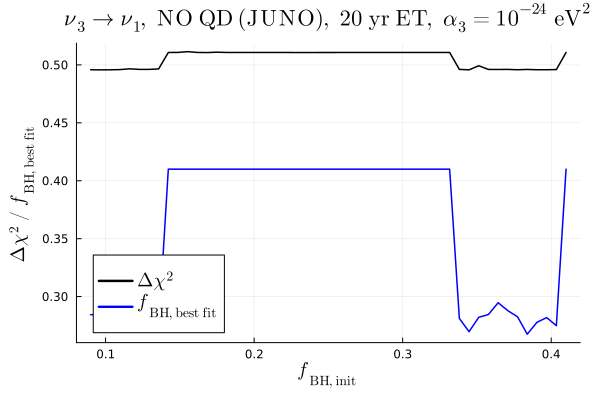

In [280]:
plot(
    fbh_inits,
    [χ2s_ttest fbh_bfs_ttest],
    lw=1.5,
    c=[:black :blue :red :orange],
    xlabel=L"f_\mathrm{BH,init}",
    ylabel=L"\Delta\chi^2~/~f_\mathrm{BH,best~fit}",
    label=[L"\mathrm{\Delta\chi^2}" L"f_\mathrm{BH,best~fit}"],
    title=L"\nu_3 \to \nu_1,~\mathrm{NO~QD~(JUNO),~20~yr~ET,~\alpha_3 = 10^{-24}~eV^2}",
    titlefontsize=15,
    xlabelfontsize=13,
    ylabelfontsize=13,
    legendfontsize=13,
    margins=3Plots.mm
)

In [178]:
chi2_3to1_NO_diffexposures_noNC = [χ2_2ν(1e-24, "NO", 1, 0.4, 0.2, true, false, "combined", τ)[1] for τ in exposures]
bestfitfbh_3to1_NO_diffexposures_noNC = [χ2_2ν(1e-24, "NO", 1, 0.4, 0.2, true, false, "combined", τ)[2][1] for τ in exposures]
chi2_3to1_NO_diffexposures_r = [χ2_2ν(1e-24, "NO", 1, 0.4, 0.2, true, true, "combined", τ)[1] for τ in exposures]
bestfitfbh_3to1_NO_diffexposures_r = [χ2_2ν(1e-24, "NO", 1, 0.4, 0.2, true, true, "combined", τ)[2][1] for τ in exposures]
chi2_3to1_NO_diffexposures_fixedfbh = [χ2_2ν(1e-24, "NO", 1, 0.4, 0.2, false, true, "combined", τ)[1] for τ in exposures]
bestfitfbh_3to1_NO_diffexposures_fixedfbh = [χ2_2ν(1e-24, "NO", 1, 0.4, 0.2, false, true, "combined", τ)[2][1] for τ in exposures];

In [115]:
findlast(x -> x < 2.71, chi2_2to1_IO_diffexposures_o) + 1

8

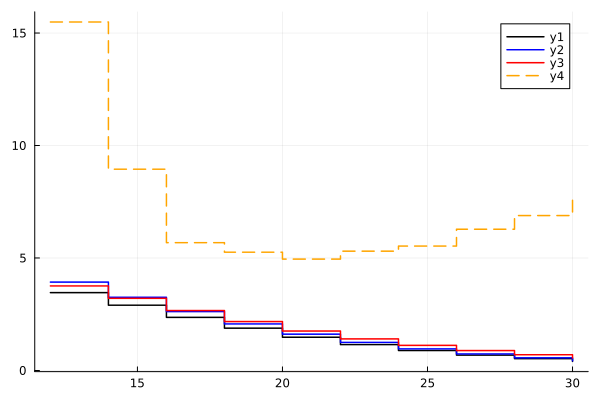

In [193]:
yrstest = 1
nullHK = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, "NOQD", 1, 0.21, SNRnorm, yrstest, "HK")
altHK = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 1e-24, "NO", 1, 0.21, SNRnorm, yrstest, "HK")
altHK_bffbh = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 1e-24, "NO", 1, 0.41, SNRnorm, yrstest, "HK");
backgrounds = background_HK(1:length(emins_exp("HK")), 1.0, 1.0, 1.0, 1.0, yrstest)
plot(
    emins_exp("HK"),
    [nullHK altHK altHK_bffbh backgrounds],
    lw=1.5,
    c=[:black :blue :red :orange],
    ls=[:solid :solid :solid :dash],
    seriestype=:step
)

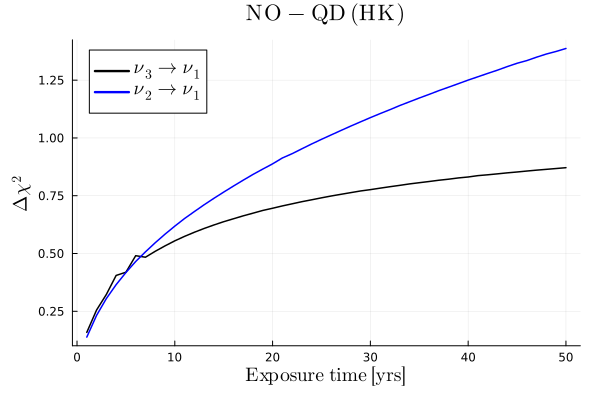

In [358]:
plot(
    exposures,
    [chi2_2to1_IO_diffexposures_r chi2_2to3_IO_diffexposures_r],
    lw=1.5,
    c=[:black :blue :red :orange],
    xlabel=L"\mathrm{Exposure~time~[yrs]}",
    ylabel=L"\Delta\chi^2",
    label=[L"\nu_3 \to \nu_1" L"\nu_2 \to \nu_1"],
    title=L"\mathrm{NO-QD~(HK)}",
    titlefontsize=15,
    xlabelfontsize=13,
    ylabelfontsize=13,
    legendfontsize=13,
    margins=3Plots.mm
)

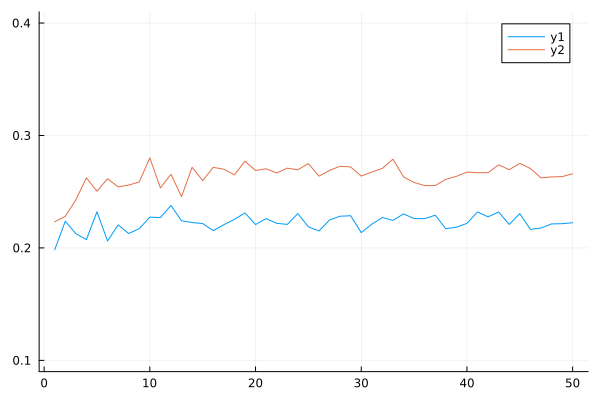

In [182]:
plot(
    exposures,
    [bestfitfbh_3to1_NO_diffexposures_r bestfitfbh_3to1_NO_diffexposures_noNC],
    ylims=(0.09, 0.41)
)